# Konjoint Analizi

* Konjoint Analiziyle katılımcılara, ürün ya da hizmetin faydası, kârı ve özellikleri değerlendirilerek belirlenen kombinasyon seçenekleri sunularak, katılımcıların bu seçenekler arasından kendi tercihleri doğrultusunda seçimler yapması istenmektedir. 
* Konjoint analiziyle elde edilmesi amaçlanan temel sonuç ise; katılımcıların hangi kombinasyonları daha fazla tercih ettiklerinin belirlenmesi ve farklı özellik düzeyleri için vermiş oldukları değerlerden, fayda fonksiyonlarının geliştirilebilmesidir. 

In [5]:
import os
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv('candidate.tab', delimiter='\t')
df = df.dropna()

In [7]:
df.head()

,resID,atmilitary,atreligion,ated,atprof,atinc,atrace,atage,atmale,selected,rating
0,383,1,6,3,6,6,1,6,2,0,0.333333
1,383,2,1,1,4,3,6,4,1,1,0.500000
2,383,1,3,5,5,1,2,5,2,1,0.666667
3,383,2,4,5,3,2,1,6,1,0,0.666667
4,383,2,1,2,3,6,2,2,2,0,0.333333


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3456 entries, 0 to 3465
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   resID       3456 non-null   int64  
 1   atmilitary  3456 non-null   int64  
 2   atreligion  3456 non-null   int64  
 3   ated        3456 non-null   int64  
 4   atprof      3456 non-null   int64  
 5   atinc       3456 non-null   int64  
 6   atrace      3456 non-null   int64  
 7   atage       3456 non-null   int64  
 8   atmale      3456 non-null   int64  
 9   selected    3456 non-null   int64  
 10  rating      3456 non-null   float64
dtypes: float64(1), int64(10)
memory usage: 324.0 KB


## Konjoint Model

Burada Göçmen birleşik verilerini kullandık. 2 olası birleşik yöntemden oluşur: seçime dayalı birleşik (hedef değişken olarak seçilen sütunla) ve derecelendirmeye dayalı birleşik (hedef değişken olarak derecelendirme ile).

In [9]:
y = df['selected']
x = df[[x for x in df.columns if x != 'selected' and x != 'resID' and x != 'rating']]

In [10]:
xdum = pd.get_dummies(x, columns=[c for c in x.columns if c != 'selected'])
xdum.head()

,atmilitary_1,atmilitary_2,atreligion_1,atreligion_2,atreligion_3,atreligion_4,atreligion_5,atreligion_6,ated_1,ated_2,...,atrace_5,atrace_6,atage_1,atage_2,atage_3,atage_4,atage_5,atage_6,atmale_1,atmale_2
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0,1,1,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,0,1,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1


### Bir Alternatifin Faydası

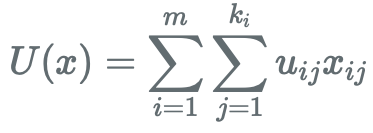


u
i
j
: kısmi değer katkısı (i niteliğinin j. seviyesinin faydası)

k
i
: i niteliği için seviye sayısı

m
: nitelik sayısı

### Bir niteliğin önemi,

R
i
=
m
a
x
(
u
i
j
)
−
m
i
n
(
u
i
k
)
 

### Bir niteliğin Göreceli Önemi
R
i
m
p
i
=
R
i
∑
m
i
=
1
R
i

Esasen konjoint analiz, hedef değişkenin; ikili (seçime dayalı birleşik analiz) veya 1-7 likert ölçeği (derecelendirme birleşik analizi) veya sıralama (sıraya dayalı birleşik analiz) olabileceği bir doğrusal regresyon modelidir. Bu sebeple çeşitli varsayımları sağlamalıdır.

In [3]:
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [12]:
res = sm.OLS(y, xdum, family=sm.families.Binomial()).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               selected   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     10.70
Date:                Sat, 11 Dec 2021   Prob (F-statistic):           8.96e-51
Time:                        12:38:04   Log-Likelihood:                -2343.5
No. Observations:                3456   AIC:                             4753.
Df Residuals:                    3423   BIC:                             4956.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
atmilitary_1 -2.477e+10   3.85e+10     -0.643      0.520      -1e+11    5.07e+10
atmilitary_2 -2.477e+10   3.85e+10     -0.643      0.520      -1e+11    5.07e+10
atreligion_1   9.75e+11   1.52e+12      0.643      0.520      -2e+12    3.95e+12
atreligion_2   9.75e+11   1.52e+12      0.643      0.520      -2e+12    3.95e+12
atreligion_3   9.75e+11   1.52e+12      0.643      0.520      -2e+12    3.95e+12
atreligion_4   9.75e+11   1.52e+12      0.643      0.520      -2e+12    3.95e+12
atreligion_5   9.75e+11   1.52e+12      0.643      0.520      -2e+12    3.95e+12
atreligion_6   9.75e+11   1.52e+12      0.643      0.520      -2e+12    3.95e+12
ated_1       -1.386e+11   2.15e+11     -0.643      0.520   -5.61e+11    2.84e+11
ated_2       -1.386e+11   2.15e+11     -0.643      0.520   -5.61e+11    2.84e+11
ated_3       -1.386e+11   2.15e+11     -0.643      0.520   -5.61e+11    2.84e+11
ated_4       -1.386e+11   2.15e+11     -0.643      0.520   -5.61e+11    2.84e+11
ated_5       -1.386e+11   2.15e+11     -0.643      0.520   -5.61e+11    2.84e+11
ated_6       -1.386e+11   2.15e+11     -0.643      0.520   -5.61e+11    2.84e+11
atprof_1     -1.435e+11   2.23e+11     -0.643      0.520   -5.81e+11    2.94e+11
atprof_2     -1.435e+11   2.23e+11     -0.643      0.520   -5.81e+11    2.94e+11
atprof_3     -1.435e+11   2.23e+11     -0.643      0.520   -5.81e+11    2.94e+11
atprof_4     -1.435e+11   2.23e+11     -0.643      0.520   -5.81e+11    2.94e+11
atprof_5     -1.435e+11   2.23e+11     -0.643      0.520   -5.81e+11    2.94e+11
atprof_6     -1.435e+11   2.23e+11     -0.643      0.520   -5.81e+11    2.94e+11
atinc_1      -1.202e+11   1.87e+11     -0.643      0.520   -4.86e+11    2.46e+11
atinc_2      -1.202e+11   1.87e+11     -0.643      0.520   -4.86e+11    2.46e+11
atinc_3      -1.202e+11   1.87e+11     -0.643      0.520   -4.86e+11    2.46e+11
atinc_4      -1.202e+11   1.87e+11     -0.643      0.520   -4.86e+11    2.46e+11
atinc_5      -1.202e+11   1.87e+11     -0.643      0.520   -4.86e+11    2.46e+11
atinc_6      -1.202e+11   1.87e+11     -0.643      0.520   -4.86e+11    2.46e+11
atrace_1     -1.119e+11   1.74e+11     -0.643      0.520   -4.53e+11    2.29e+11
atrace_2     -1.119e+11   1.74e+11     -0.643      0.520   -4.53e+11    2.29e+11
atrace_3     -1.119e+11   1.74e+11     -0.643      0.520   -4.53e+11    2.29e+11
atrace_4     -1.119e+11   1.74e+11     -0.643      0.520   -4.53e+11    2.29e+11
atrace_5     -1.119e+11   1.74e+11     -0.643      0.520   -4.53e+11    2.29e+11
atrace_6     -1.119e+11   1.74e+11     -0.643      0.520   -4.53e+11    2.29e+11
atage_1      -1.048e+11   1.63e+11     -0.643      0.520   -4.24e+11    2.15e+11
atage_2      -1.048e+11   1.63e+11     -0.643      0.520   -4.24e+11    2.15e+11
atage_3      -1.048e+11   1.63e+11     -0.643      0.520   -4.24e+11    2.15e+11
atage

In [13]:
df_res = pd.DataFrame({
    'param_name': res.params.keys()
    , 'param_w': res.params.values
    , 'pval': res.pvalues
})
# adding field for absolute of parameters
df_res['abs_param_w'] = np.abs(df_res['param_w'])
# marking field is significant under 95% confidence interval
df_res['is_sig_95'] = (df_res['pval'] < 0.05)
# constructing color naming for each param
df_res['c'] = ['blue' if x else 'red' for x in df_res['is_sig_95']]

# make it sorted by abs of parameter value
df_res = df_res.sort_values(by='abs_param_w', ascending=True)

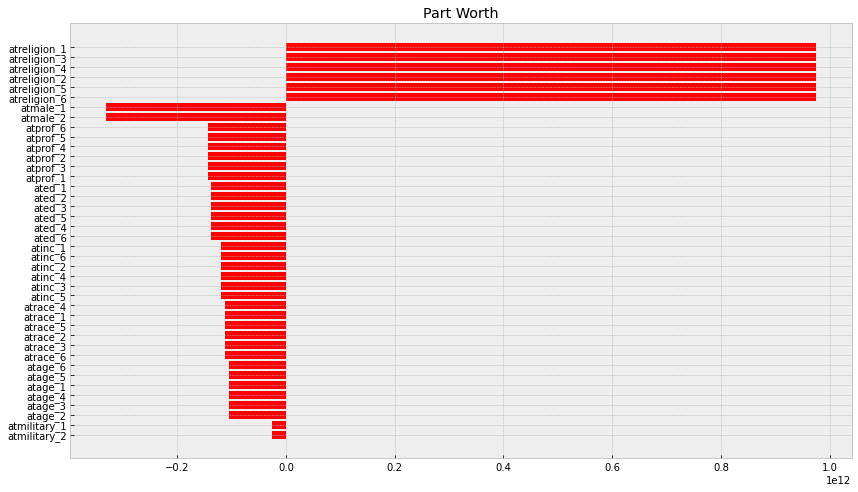

In [14]:
f, ax = plt.subplots(figsize=(14, 8))
plt.title('Part Worth')
pwu = df_res['param_w']
xbar = np.arange(len(pwu))
plt.barh(xbar, pwu, color=df_res['c'])
plt.yticks(xbar, labels=df_res['param_name'])
plt.show()